<a href="https://colab.research.google.com/github/jadenfix/causal_machinelearning/blob/main/Homework_2_Simulation_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Simulating Data for Problem 1 ---
Exogenous variables (U_ed, U_a, U_w, U_ex) simulated.
Endogenous variables (A, Ed, Ex, wage) calculated.
DataFrame created with log variables (ln_wage, ln_Ed, ln_A, ln_Ex).
DataFrame shape: (1000000, 4)

--- Running OLS Regressions for Problem 1 ---

--- Step 5: Regression of ln_wage on: const, ln_Ed, ln_A ---
Coefficients:
const    1.611075
ln_Ed    0.998681
ln_A     1.502110
dtype: float64

Standard Errors:
const    0.004442
ln_Ed    0.001120
ln_A     0.001840
dtype: float64

--- Step 6: Regression of ln_wage on: const, ln_Ed ---
Coefficients:
const    2.879149
ln_Ed    1.555415
dtype: float64

Standard Errors:
const    0.005372
ln_Ed    0.001146
dtype: float64

--- Step 7: Regression of ln_wage on: const, ln_Ed, ln_Ex ---
Coefficients:
const    2.226672
ln_Ed    0.498095
ln_Ex    0.771608
dtype: float64

Standard Errors:
const    0.004270
ln_Ed    0.001593
ln_Ex    0.000962
dtype: float64

--- Step 8: Identical specification to Step 6 ---

--- S

<ipython-input-2-b1fc485ce1bf>:213: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


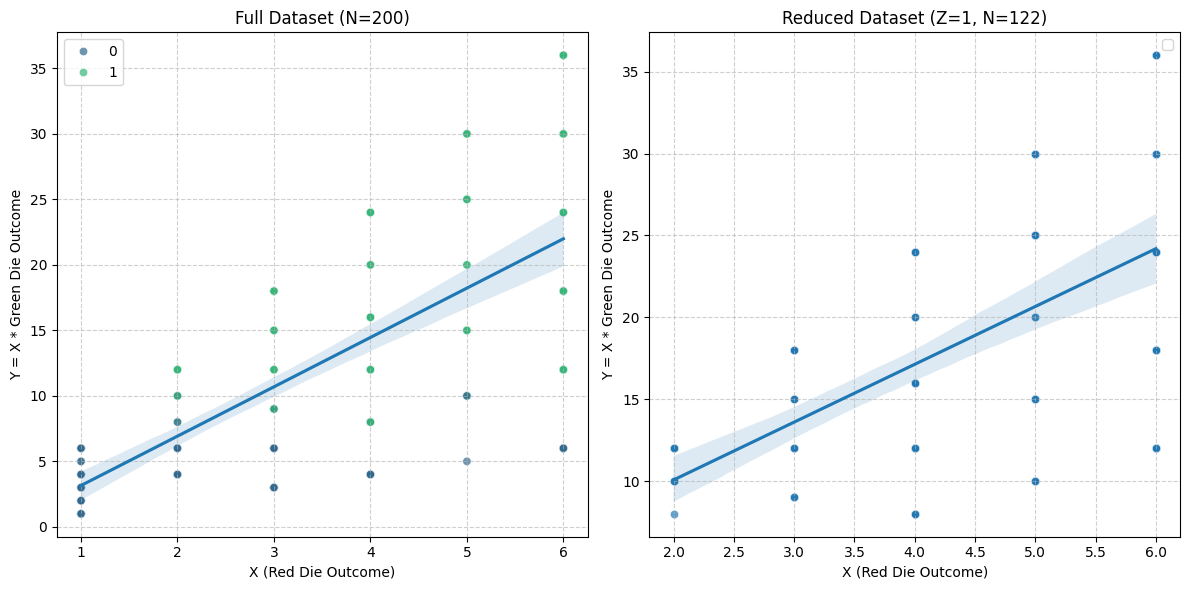

Plot displayed.

--- Problem 3 Coefficient Comparison ---
Full dataset size: 200
Reduced dataset (Z=1) size: 122
Coefficient of X (Full Data, Step 3): 3.7665
Coefficient of X (Reduced Data Z=1, Step 4): 3.5304


--- Script execution finished ---


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# --- Problem 1: Mincer Model Simulation ---

# Set parameters based on the problem description and additions
alpha = 5
n = 1_000_000

# 1. Simulate the exogenous variables (U variables)
print("--- Simulating Data for Problem 1 ---")
np.random.seed(42) # for reproducibility
# Use 1e-6 as lower bound for U_ed to avoid potential log(0) issues.
U_ed = np.random.uniform(1e-6, 20, n)
U_a = np.random.uniform(1, 30, n)
U_w = np.random.normal(0, 1, n)
U_ex = np.random.normal(0, 1, n)
print("Exogenous variables (U_ed, U_a, U_w, U_ex) simulated.")

# 2. Simulate the endogenous variables based on the economic model (using Addendum corrections)
A = U_a # Ability
Ed = A * U_ed # Education (Ed > 0 guaranteed by U_ed lower bound)
# Experience equation from Addendum
Ex = Ed * A * np.exp(U_ex) # Experience
# Wage equation from Addendum
wage = alpha * (Ed**0.5) * (Ex**0.5) * A * np.exp(U_w)
print("Endogenous variables (A, Ed, Ex, wage) calculated.")

# 3. Create a pandas DataFrame and calculate log variables
df_mincer = pd.DataFrame({
    'ln_wage': np.log(wage),
    'ln_Ed':   np.log(Ed),
    'ln_A':    np.log(A),
    'ln_Ex':   np.log(Ex),
    # Optionally keep original variables if needed for checks
    # 'U_ed': U_ed, 'U_a': U_a, 'U_w': U_w, 'U_ex': U_ex,
    # 'A': A, 'Ed': Ed, 'Ex': Ex, 'wage': wage
})
print("DataFrame created with log variables (ln_wage, ln_Ed, ln_A, ln_Ex).")
print(f"DataFrame shape: {df_mincer.shape}")


# --- OLS Regressions for Problem 1 ---

# Helper function to run OLS and print results clearly
def run_ols(df, y_var, x_vars, step_num):
    """
    Runs OLS regression using statsmodels.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        y_var (str): Name of the dependent variable column.
        x_vars (list): List of names of the independent variable columns.
        step_num (str): Identifier for the regression step (e.g., "Step 5").

    Returns:
        statsmodels.regression.linear_model.RegressionResultsWrapper: Fitted OLS results object.
    """
    print(f"\n--- {step_num}: Regression of {y_var} on: const, {', '.join(x_vars)} ---")
    Y = df[y_var]
    # Ensure x_vars is always treated as a list for consistent indexing
    X = df[x_vars if isinstance(x_vars, list) else [x_vars]]
    # Add a constant (intercept) to the model
    X = sm.add_constant(X, has_constant='add')
    # Define the OLS model
    model = sm.OLS(Y, X)
    # Fit the model
    results = model.fit()
    # Print the coefficients and standard errors
    print(f"Coefficients:\n{results.params}")
    print(f"\nStandard Errors:\n{results.bse}")
    # Uncomment below to print the full OLS summary table
    # print(results.summary())
    return results

print("\n--- Running OLS Regressions for Problem 1 ---")

# 5. Regression: ln_wage on ln_Ed and ln_A
results_5 = run_ols(df_mincer, 'ln_wage', ['ln_Ed', 'ln_A'], "Step 5")

# 6. Regression: ln_wage on ln_Ed (without ln_A)
results_6 = run_ols(df_mincer, 'ln_wage', ['ln_Ed'], "Step 6")

# 7. Regression: ln_wage on ln_Ed and ln_Ex
results_7 = run_ols(df_mincer, 'ln_wage', ['ln_Ed', 'ln_Ex'], "Step 7")

# 8. Regression: ln_wage on ln_Ed (without ln_Ex)
# Note: This specification is identical to Step 6.
print("\n--- Step 8: Identical specification to Step 6 ---")
results_8 = results_6 # Reuse results from step 6
print("\n--- Step 8 Results (same as Step 6) ---")
print(" Coefficients:\n", results_8.params)
print(" SEs:\n",        results_8.bse)
# 9. Regression: ln_wage on ln_Ed, ln_A, and ln_Ex
# This is the 'full' model based on the log-linear derivation
results_9 = run_ols(df_mincer, 'ln_wage', ['ln_Ed', 'ln_A', 'ln_Ex'], "Step 9")


# --- Problem 2: Dice Model 1 Simulation ---

print("\n\n--- Simulating Data for Problem 2 ---")
# Simulate dice rolls (integers 1 through 6)
np.random.seed(123) # for reproducibility
n_obs_p2 = 100
U_x_p2 = np.random.randint(1, 7, n_obs_p2) # Red die
U_y_p2 = np.random.randint(1, 7, n_obs_p2) # Green die
U_z_p2 = np.random.randint(1, 7, n_obs_p2) # White die
print(f"Simulated {n_obs_p2} rolls for U_x, U_y, U_z.")

# Generate structural variables X, Y, Z
X_p2 = U_x_p2
Y_p2 = U_y_p2
Z_p2 = X_p2 + Y_p2 + U_z_p2 # Z is a collider
print("Calculated X, Y, Z based on dice rolls.")

# Create DataFrame for Problem 2
# Include U_z as it's needed for Z2 calculation later
df_p2 = pd.DataFrame({
    'X': X_p2,
    'Y': Y_p2,
    'Z': Z_p2,
    'U_x': U_x_p2, # Include U's for potential checks
    'U_y': U_y_p2,
    'U_z': U_z_p2
})
print("DataFrame created for Problem 2.")
print(f"DataFrame shape: {df_p2.shape}")


print("\n--- Running OLS Regressions for Problem 2 ---")

# 1. Regression: Y on X (Assess marginal association)
results_p2_1 = run_ols(df_p2, 'Y', ['X'], "Problem 2, Step 1")

# 2. Regression: Y on X, controlling for Z (Conditioning on a collider)
results_p2_2 = run_ols(df_p2, 'Y', ['X', 'Z'], "Problem 2, Step 2")

# 4. Generate Z2 and run regression: Y on X and Z2
# Z2 = X + U_z (Note: U is assumed to be U_z based on context)
df_p2['Z2'] = df_p2['X'] + df_p2['U_z']
print("\nCalculated Z2 = X + U_z.")
results_p2_4 = run_ols(df_p2, 'Y', ['X', 'Z2'], "Problem 2, Step 4")


# --- Problem 3: Dice Model 2 Simulation ---

print("\n\n--- Simulating Data for Problem 3 ---")
np.random.seed(456) # for reproducibility
n_obs_p3 = 200
U_x_p3 = np.random.randint(1, 7, n_obs_p3) # Red die
U_y_p3 = np.random.randint(1, 7, n_obs_p3) # Green die
U_z_p3 = np.random.randint(1, 7, n_obs_p3) # White die
print(f"Simulated {n_obs_p3} rolls for U_x, U_y, U_z.")

# Generate structural variables X, Y, Z
X_p3 = U_x_p3
Y_p3 = X_p3 * U_y_p3 # Y depends on X
Z_p3 = (Y_p3 + U_z_p3 > 12).astype(int) # Z is indicator based on Y and U_z (Selection variable)
print("Calculated X, Y, Z based on dice rolls and model structure.")

# Create DataFrame for Problem 3
df_p3 = pd.DataFrame({
    'X': X_p3,
    'Y': Y_p3,
    'Z': Z_p3,
    'U_x': U_x_p3, # Include U's for potential checks
    'U_y': U_y_p3,
    'U_z': U_z_p3
})
print("DataFrame created for Problem 3.")
print(f"DataFrame shape: {df_p3.shape}")


print("\n--- Running OLS Regressions for Problem 3 ---")

# 3. Regression: Y on X (Full Dataset - Estimate ACE)
results_p3_3 = run_ols(df_p3, 'Y', ['X'], "Problem 3, Step 3 (Full Data)")

# 4. Regression: Y on X (Reduced Dataset where Z=1 - Assess selection bias)
# Create the subset where Z=1
df_p3_reduced = df_p3[df_p3['Z'] == 1].copy()
print(f"\nCreated reduced dataset where Z=1. Size: {len(df_p3_reduced)} observations.")
results_p3_4 = run_ols(df_p3_reduced, 'Y', ['X'], "Problem 3, Step 4 (Reduced Data Z=1)")

# 5. Visualization for comparison (Problem 3)
print("\n\n--- Problem 3: Generating Visualization ---")
plt.figure(figsize=(12, 6)) # Set figure size

# Subplot 1: Full Dataset
plt.subplot(1, 2, 1) # (rows, columns, panel number)
# Scatter plot points, colored by the value of Z
sns.scatterplot(data=df_p3, x='X', y='Y', hue='Z', alpha=0.7, palette='viridis')
# Add regression line for the full dataset (using seaborn defaults for color)
sns.regplot(data=df_p3, x='X', y='Y', scatter=False, line_kws={'label':'Full Data Regression'})
plt.title('Full Dataset (N={})'.format(len(df_p3)))
plt.xlabel('X (Red Die Outcome)')
plt.ylabel('Y = X * Green Die Outcome')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Add grid lines

# Subplot 2: Reduced Dataset (Z=1)
plt.subplot(1, 2, 2)
# Scatter plot points for the Z=1 subset
sns.scatterplot(data=df_p3_reduced, x='X', y='Y', alpha=0.7)
# Add regression line for the reduced dataset (Z=1)
sns.regplot(data=df_p3_reduced, x='X', y='Y', scatter=False, line_kws={'label':'Reduced Data (Z=1) Regression'})
plt.title('Reduced Dataset (Z=1, N={})'.format(len(df_p3_reduced)))
plt.xlabel('X (Red Die Outcome)')
plt.ylabel('Y = X * Green Die Outcome')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) # Add grid lines

plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Display the plot
print("Plot displayed.")

# Print comparison of coefficients for Problem 3
print(f"\n--- Problem 3 Coefficient Comparison ---")
print(f"Full dataset size: {len(df_p3)}")
print(f"Reduced dataset (Z=1) size: {len(df_p3_reduced)}")
# Access the coefficient for 'X' from the results objects
print(f"Coefficient of X (Full Data, Step 3): {results_p3_3.params['X']:.4f}")
print(f"Coefficient of X (Reduced Data Z=1, Step 4): {results_p3_4.params['X']:.4f}")

print("\n\n--- Script execution finished ---")
